In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
sklearn.__version__

'1.6.1'

In [4]:
df = pd.read_csv("./calories.csv")

In [5]:
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
df.shape


(15000, 9)

In [7]:
df.info() # shows us columns, non-null count and the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
df.isnull().sum(axis=0) # checking for null values

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
df.duplicated().sum() # checking for duplicated rows

0

In [10]:
df.Gender.value_counts() # checking garbage values in object type column

female    7553
male      7447
Name: Gender, dtype: int64

## Exploaratory Data Analysis

In [11]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


In [12]:
# Gender column needs to be one hot encoded as it is of object and categorical in nature with no order
onehotencoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform="pandas")
        

In [13]:
transformdata= onehotencoder.fit_transform(df[["Gender"]])


In [14]:
transformdata

,Gender_female,Gender_male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
14995,1.0,0.0
14996,1.0,0.0
14997,1.0,0.0
14998,0.0,1.0


In [15]:
df = pd.concat([df, transformdata], axis =1)


In [16]:
#combined dataset
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,0.0,1.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1.0,0.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,0.0,1.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1.0,0.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1.0,0.0


In [17]:
columnlist = []

for c in df.columns:
    if c!="User_ID" and c!="Gender":
        columnlist.append(c)

In [18]:
columnlist

['Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'Calories',
 'Gender_female',
 'Gender_male']

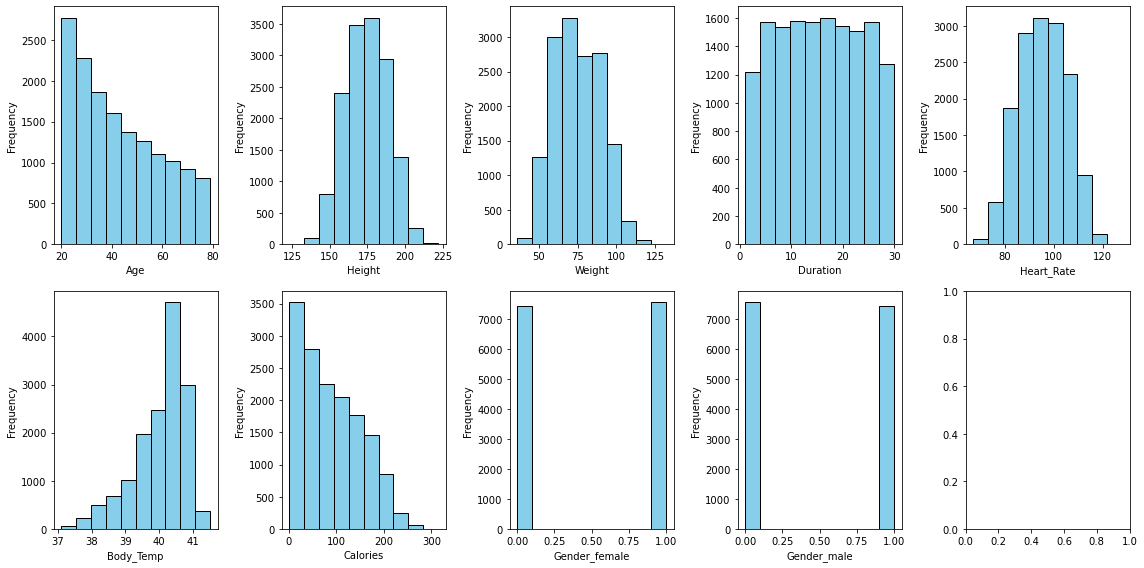

In [19]:
fig, axes = plt.subplots(2, 5, figsize=(16,8 ))
axes = axes.flatten() # flattens a 2D array to 1D array 

for i in range(9):
    axes[i].hist(df[columnlist[i]], color="skyblue", edgecolor="black", density=False)
    axes[i].set_xlabel(columnlist[i])
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

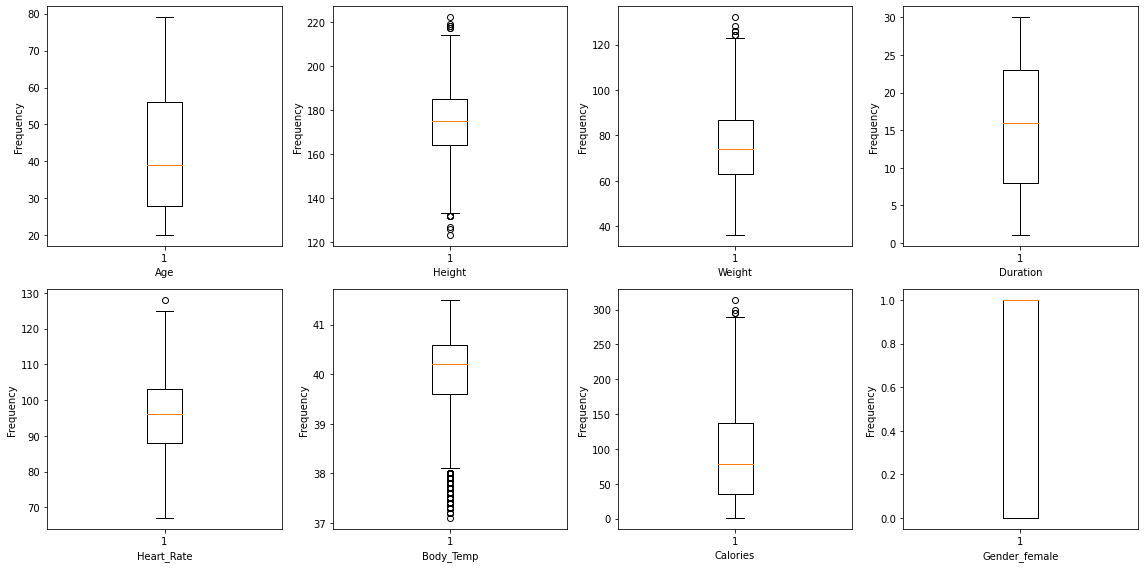

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(16,8 ))
axes = axes.flatten() # flattens a 2D array to 1D array 

for i in range(8):
    axes[i].boxplot(df[columnlist[i]])
    axes[i].set_xlabel(columnlist[i])
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## Removing Outliers


In [21]:
# Height, Body_Temp, Weight - handling outliers
def getWhiskers(column):
    q1 = column.quantile(0.25)
    q3= column.quantile(0.75)
    iqr = q3-q1
    upperWhisker= q3+ 1.5*iqr
    lowerWhisker=q1-1.5*iqr
    return lowerWhisker, upperWhisker
            


In [22]:
bt_w = getWhiskers(df.Body_Temp)
print(df[(df.Body_Temp<bt_w[0]) | (df.Body_Temp> bt_w[1])].shape[0])
wg_w = getWhiskers(df.Weight)
print(df[(df.Weight<wg_w[0]) | (df.Weight> wg_w[1])].shape[0])
ht_w = getWhiskers(df.Height)
print(df[(df.Height<ht_w[0]) | (df.Height> ht_w[1])].shape[0])


369
6
14


In [23]:
# Now for Body_Temp and Height number of rows are big we then need to cap them
for i in range(15000):
    if(df.loc[i,"Body_Temp"]>bt_w[1]):
        df.loc[i,"Body_Temp"]= bt_w[1]
    elif df.loc[i,"Body_Temp"]< bt_w[0]:
        df.loc[i,"Body_Temp"]=bt_w[0]
        
for i in range(15000):
    if(df.loc[i,"Height"]>ht_w[1]):
        df.loc[i,"Height"]= ht_w[1]
    elif df.loc[i,"Height"]< ht_w[0]:
        df.loc[i,"Height"]=ht_w[0]

In [24]:
#Now to remove outliers from Weight
df = df[(df["Weight"]<wg_w[1]) & (df["Weight"]>wg_w[0])]

In [25]:
bt_w = getWhiskers(df.Body_Temp)
print(df[(df.Body_Temp<bt_w[0]) | (df.Body_Temp> bt_w[1])].shape[0])
wg_w = getWhiskers(df.Weight)
print(df[(df.Weight<wg_w[0]) | (df.Weight> wg_w[1])].shape[0])
ht_w = getWhiskers(df.Height)
print(df[(df.Height<ht_w[0]) | (df.Height> ht_w[1])].shape[0])

0
0
0


In [26]:
df= df.reset_index(drop=True)
df.tail(3)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
14990,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0,1.0,0.0
14991,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0,0.0,1.0
14992,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0,0.0,1.0


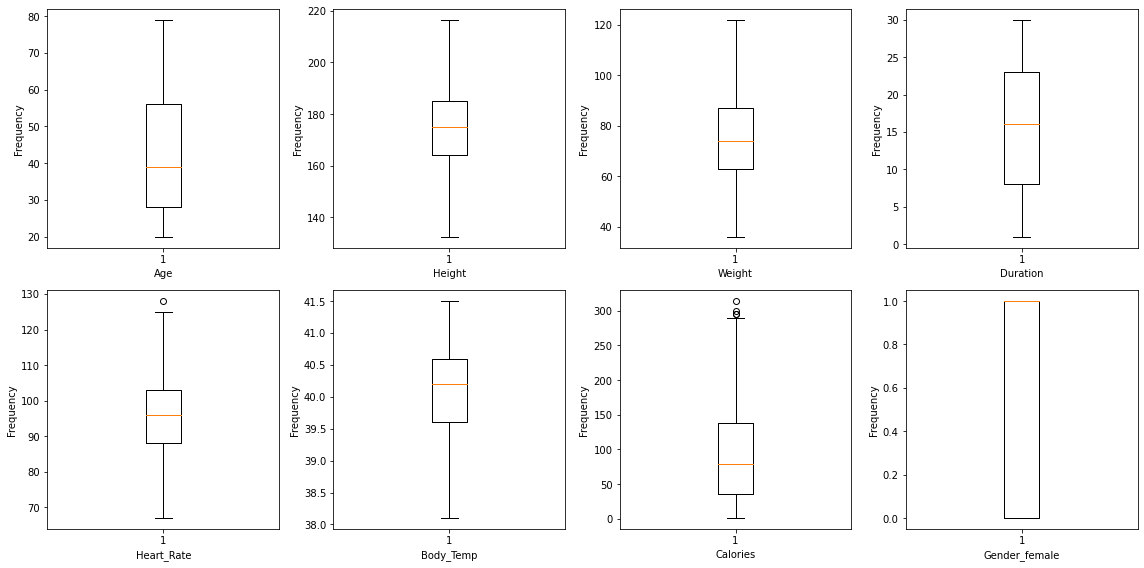

In [27]:
#to check outlier removal and capping

fig, axes = plt.subplots(2, 4, figsize=(16,8 ))
axes = axes.flatten() # flattens a 2D array to 1D array 

for i in range(8):
    axes[i].boxplot(df[columnlist[i]])
    axes[i].set_xlabel(columnlist[i])
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

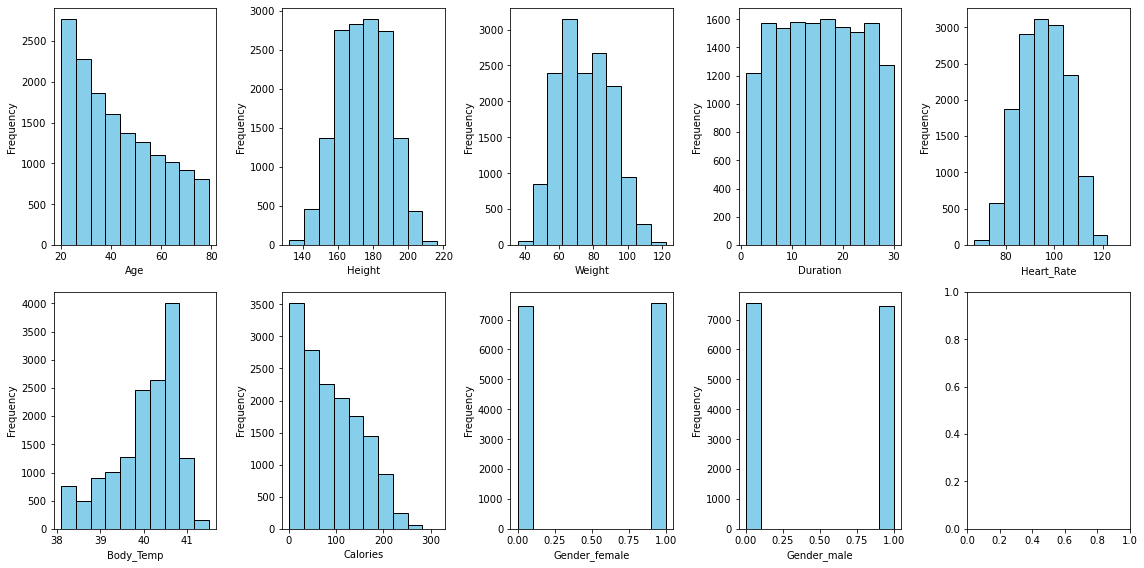

In [28]:
# Now we will see if skew has been impacted or not
fig, axes = plt.subplots(2, 5, figsize=(16,8 ))
axes = axes.flatten() # flattens a 2D array to 1D array 

for i in range(9):
    axes[i].hist(df[columnlist[i]], color="skyblue", edgecolor="black")
    axes[i].set_xlabel(columnlist[i])
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()





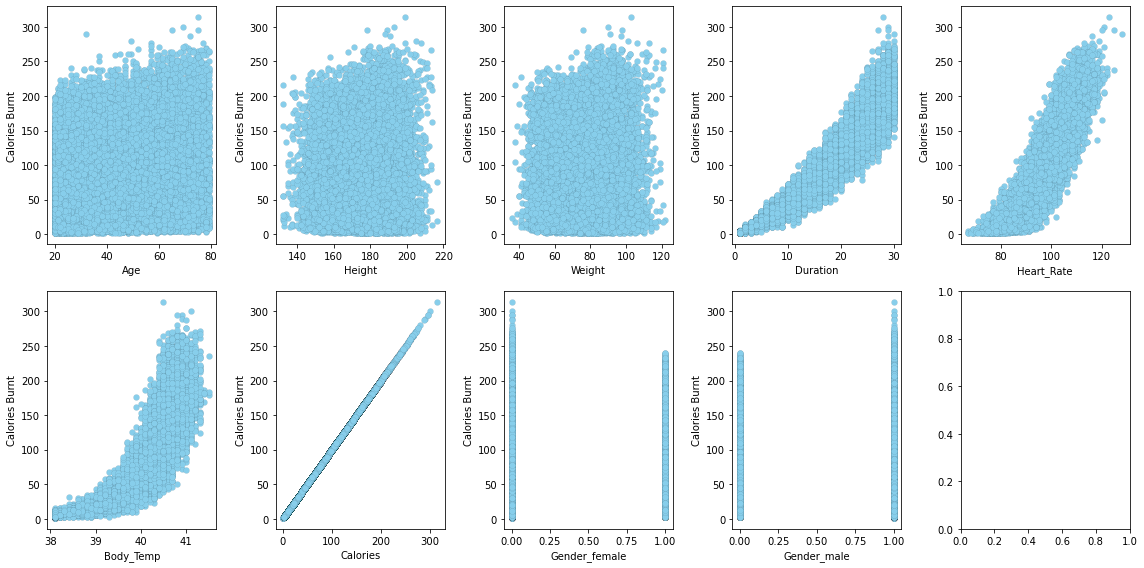

In [29]:
# scatter plot helps us identify relationship between variables
fig, axes = plt.subplots(2, 5, figsize=(16,8 ))
axes = axes.flatten() # flattens a 2D array to 1D array 

for i in range(9):
    axes[i].scatter(df[columnlist[i]], df.Calories, color="skyblue", edgecolor="black", linewidth=0.05)
    axes[i].set_xlabel(columnlist[i])
    axes[i].set_ylabel("Calories Burnt")

plt.tight_layout()
plt.show()
 

In [30]:
corrmatrix = df[columnlist].corr()

In [31]:
corrmatrix

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
Age,1.000000,0.009484,0.090119,0.012982,0.010404,0.011990,0.154096,-0.003135,0.003135
Height,0.009484,1.000000,0.958391,-0.004254,0.000952,0.001763,0.017700,-0.710916,0.710916
Weight,0.090119,0.958391,1.000000,-0.001496,0.004735,0.004442,0.035638,-0.783900,0.783900
Duration,0.012982,-0.004254,-0.001496,1.000000,0.852912,0.911472,0.955435,-0.003536,0.003536
Heart_Rate,0.010404,0.000952,0.004735,0.852912,1.000000,0.778586,0.897955,-0.011669,0.011669
Body_Temp,0.011990,0.001763,0.004442,0.911472,0.778586,1.000000,0.834185,-0.007278,0.007278
Calories,0.154096,0.017700,0.035638,0.955435,0.897955,0.834185,1.000000,-0.022360,0.022360
Gender_female,-0.003135,-0.710916,-0.783900,-0.003536,-0.011669,-0.007278,-0.022360,1.000000,-1.000000
Gender_male,0.003135,0.710916,0.783900,0.003536,0.011669,0.007278,0.022360,-1.000000,1.000000


<AxesSubplot:>

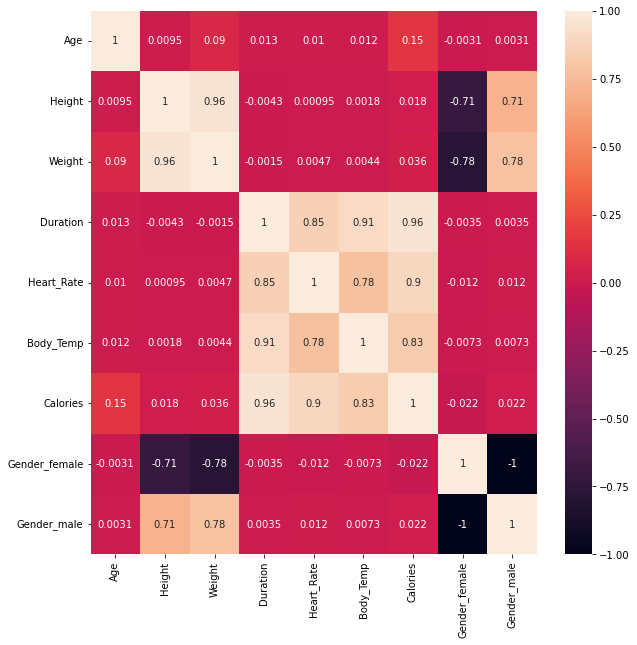

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(corrmatrix, annot= True)

## Feature Selection

In [33]:
# Now based on the heat map and scatterplot we can see a strong correlation between our target variable Calories and
# features - Duration, Body_Temp, Heart_Rate and Age - We are selection features with correlation> 0.09
# So we will use this for our model

In [34]:
feature_df = df[["Duration","Body_Temp","Heart_Rate","Age"]]

In [35]:
feature_df


,Duration,Body_Temp,Heart_Rate,Age
0,29.0,40.8,105.0,68
1,14.0,40.3,94.0,20
2,5.0,38.7,88.0,69
3,13.0,40.5,100.0,34
4,10.0,39.8,81.0,27
...,...,...,...,...
14988,11.0,40.4,92.0,20
14989,6.0,39.2,85.0,27
14990,16.0,40.1,90.0,43
14991,2.0,38.3,84.0,78


In [36]:
target_df = df[["Calories"]]

In [37]:
target_df

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0
...,...
14988,45.0
14989,23.0
14990,75.0
14991,11.0


In [38]:
X_train,X_test,y_train,y_test = train_test_split(feature_df, target_df, test_size= 0.20, random_state=42)

In [39]:
X_train

,Duration,Body_Temp,Heart_Rate,Age
6786,24.0,40.2,99.0,50
9837,7.0,39.5,81.0,37
7688,2.0,38.3,76.0,44
6556,12.0,40.3,89.0,22
11322,4.0,39.0,90.0,78
...,...,...,...,...
5191,6.0,39.0,84.0,24
13418,1.0,38.1,87.0,37
5390,18.0,40.6,91.0,28
860,12.0,40.2,97.0,35


In [40]:
X_test

,Duration,Body_Temp,Heart_Rate,Age
13408,14.0,40.2,92.0,33
6472,26.0,40.9,113.0,68
9967,29.0,41.0,108.0,22
862,24.0,40.8,108.0,35
5967,24.0,40.8,108.0,45
...,...,...,...,...
8191,26.0,40.6,98.0,31
3297,27.0,40.7,99.0,33
14107,2.0,38.5,82.0,44
5513,7.0,39.7,86.0,55


In [41]:
y_train

,Calories
6786,141.0
9837,17.0
7688,6.0
6556,49.0
11322,25.0
...,...
5191,16.0
13418,4.0
5390,68.0
860,57.0


In [42]:
y_test

,Calories
13408,55.0
6472,223.0
9967,164.0
862,161.0
5967,185.0
...,...
8191,137.0
3297,141.0
14107,8.0
5513,34.0


In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [45]:
model.coef_


array([[  6.70576817, -18.07500387,   1.99820519,   0.52675432]])

In [46]:
model.intercept_


array([495.60632067])

In [47]:
model.score(X_train,y_train)

0.9660568642711871

In [48]:
model.score(X_test,y_test)

0.9678471406736248

In [49]:
y_predict= model.predict(X_test)

In [50]:
print(y_predict)

[[6.40896898e+01]
 [1.92305116e+02]
 [1.76393195e+02]
 ...
 [1.60224042e-01]
 [2.57861786e+01]
 [1.81030823e+02]]


In [51]:
# manual calculation of Mean Square Error, Mean Absolute Error and r**2 score
meanabser= sklearn.metrics.mean_absolute_error(y_test,y_predict)
meansqer = sklearn.metrics.mean_squared_error(y_test,y_predict)
r2score = sklearn.metrics.r2_score(y_test,y_predict)
print(meanabser, meansqer, r2score)

8.305969715448208 124.46336563969157 0.9678471406736248


In [52]:
rmse = sklearn.metrics.root_mean_squared_error(y_test, y_predict)

In [53]:
rmse

11.15631505649117

## Visualization of y_test and y_predict

In [54]:
len= X_test.shape[1]
len

4

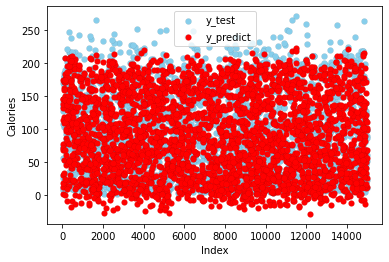

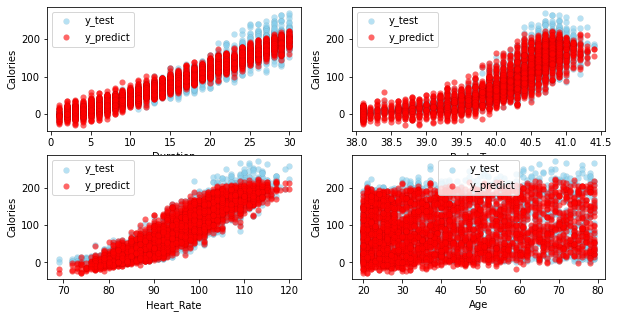

In [55]:
plt.scatter(y_test.index, y_test, color="skyblue", edgecolor="black", linewidths= 0.05, label="y_test")
plt.scatter(y_test.index, y_predict, color="red", edgecolor="black", linewidths=0.05, label="y_predict")
plt.xlabel("Index")
plt.ylabel("Calories")
plt.legend()
plt.show()
fig, ax = plt.subplots(2,int(len/2), figsize=(10,5))
ax=ax.flatten()

for i in range(len): 
    ax[i].scatter(X_test[X_test.columns[i]], y_test, color="skyblue", edgecolor="black", linewidths= 0.05, label="y_test", alpha=0.6)
    ax[i].scatter(X_test[X_test.columns[i]], y_predict, color="red", edgecolor="black", linewidths=0.05,label="y_predict", alpha=0.6)
    
    ax[i].set_xlabel(X_test.columns[i])
    ax[i].set_ylabel(y_test.columns[0])
    ax[i].legend()

plt.show()

# Seeing model outcome with data

In [60]:
xinput={"Duration" : 25,
        "Body_Temp":40, 
        "Heart_Rate":95,
        "Age":26
       }
xinput

Xinputdf= pd.DataFrame(data= [xinput])
Xinputdf


,Duration,Body_Temp,Heart_Rate,Age
0,25,40,95,26


In [61]:
youtput = model.predict(Xinputdf)

In [62]:
youtput

array([[143.77547574]])